## Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Load dataSet
data = pd.read_csv('data/Bengaluru_House_Data.csv')
dataset = data.copy()
dataset.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


## Data Cleaning
Delete Availability column beacuse it seems to have no relation with price.
Drop Society because it has many null values

In [3]:
dataset.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
dataset = dataset.drop(['availability','society'], axis = 1)

In [5]:
dataset.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
#data1 = dataset[dataset['balcony'].isnull().any()]
balconyNull = dataset.loc[dataset['balcony'].isna()]
occurance = dataset['balcony'].value_counts()
print("Occurance of balcony")
print(occurance)

Occurance of balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64


## Fill NaN Value of 'Balcony' and 'Bath'
Since Balcony and Bath are discrete value, so w should check it frequency.
After checking it frequence , we can fill NaN by it median

In [7]:
dataset["balcony"].fillna(dataset["balcony"].median(), inplace = True) # 
dataset["bath"].fillna(dataset["bath"].median(), inplace = True) 


In [8]:
dataset.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [9]:
## Drop This row because, there is only one null, if we drop ,it will not hamper our model/analysys
locationNull = dataset.loc[dataset['location'].isna()]
locationNull

,area_type,location,size,total_sqft,bath,balcony,price
568,Super built-up Area,NaN,3 BHK,1600,3.0,2.0,86.0


In [10]:
 dataset.drop(568, inplace = True)

In [11]:
dataset.isnull().sum()

area_type      0
location       0
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [12]:
sizeNull = dataset.loc[dataset['size'].isna()]
dataset = dataset.dropna(how = 'any')
dataset.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
dataset['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
## Lets Add new Column because bedroom and BHK seems to be same

In [15]:
def getBHK(bedroom):
    return int(bedroom.split(" ")[0])

In [16]:
dataset['BHK'] = dataset['size'].apply(lambda x : getBHK(x))

In [17]:
dataset.tail(20)

,area_type,location,size,total_sqft,bath,balcony,price,BHK
13300,Plot Area,Hosakerehalli,5 Bedroom,1500,6.0,2.0,145.00,5
13301,Super built-up Area,Kothanur,3 BHK,1454,3.0,3.0,71.50,3
13302,Super built-up Area,Annaiah Reddy Layout,2 BHK,1075,2.0,2.0,48.00,2
13303,Plot Area,Vidyaranyapura,5 Bedroom,774,5.0,3.0,70.00,5
13304,Super built-up Area,Raja Rajeshwari Nagar,2 BHK,1187,2.0,2.0,40.14,2
13305,Carpet Area,Hulimavu,1 BHK,500,1.0,3.0,220.00,1
13306,Plot Area,Rajarajeshwari Nagara,4 Bedroom,1200,5.0,2.0,325.00,4
13307,Built-up Area,Billekahalli,3 BHK,1805,3.0,3.0,134.00,3
13308,Built-up Area,Bannerghatta Road,3 BHK,1527,3.0,1.0,142.00,3
13309,Super built-up Area,Yeshwanthpur,3 BHK,1675,3.0,2.0,92.13,3


In [18]:
def convertSqftToNum(sqft):
    
    list1 = sqft.split("-")
    if len(list1) == 2:
        x1 = float(list1[0])
        x2 = float(list1[1])
        return (x1 + x2) / 2
    try:
        return float(list1[0])
    except : 
        return None
    

In [19]:
dataset['t_sqft'] = dataset['total_sqft'].apply(convertSqftToNum) ## Call custome function

In [20]:
dataset.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,t_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0


In [21]:
dataset.isnull().sum()
dataset.dropna(how = 'any', inplace = True)

In [22]:
dataset.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
t_sqft        0
dtype: int64

## Feature Engineering

In [23]:
datasetF = dataset.copy()
dataset.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,t_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0


In [24]:

datasetF['price_per_sqrft'] = (datasetF['price'] / datasetF['t_sqft'] * 100000) # Price in lack

In [26]:
datasetF.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,t_sqft,price_per_sqrft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0,4250.000000


## Now Check Location

In [29]:
len(datasetF['location'].unique())

1298

## Check data points by locations

In [39]:
## remove Space
datasetF['location'] = datasetF['location'].apply(lambda x : x.strip())
locationStat = datasetF.groupby('location')['location'].agg('count').sort_values(ascending = False)
locationStat

location
Whitefield                                      538
Sarjapur  Road                                  397
Electronic City                                 304
Kanakpura Road                                  271
Thanisandra                                     236
Yelahanka                                       212
Uttarahalli                                     186
Hebbal                                          177
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Hennur Road                                     152
Bannerghatta Road                               151
7th Phase JP Nagar                              148
Haralur Road                                    142
Electronic City Phase II                        132
Rajaji Nagar                                    107
Chandapura                                      100
Bellandur                                        96
KR Puram                                         91
Hoo

In [40]:
## Now make some thresh hold

In [44]:
len(locationStat[locationStat <= 10])

1047

In [47]:
location_stat_less_10 = locationStat[locationStat <= 10]


In [51]:
len(datasetF['location'].unique())

1287

In [53]:
datasetF.location = datasetF.location.apply(lambda x: 'other' if  x  in location_stat_less_10 else x)

In [58]:
#len(datasetF['location'].unique())
locationStat1 = datasetF.groupby('location')['location'].agg('count').sort_values(ascending = False)
locationStat1

location
other                        2873
Whitefield                    538
Sarjapur  Road                397
Electronic City               304
Kanakpura Road                271
Thanisandra                   236
Yelahanka                     212
Uttarahalli                   186
Hebbal                        177
Marathahalli                  175
Raja Rajeshwari Nagar         171
Hennur Road                   152
Bannerghatta Road             151
7th Phase JP Nagar            148
Haralur Road                  142
Electronic City Phase II      132
Rajaji Nagar                  107
Chandapura                    100
Bellandur                      96
KR Puram                       91
Electronics City Phase 1       88
Hoodi                          88
Yeshwanthpur                   85
Begur Road                     84
Sarjapur                       81
Kasavanhalli                   79
Harlur                         79
Banashankari                   74
Hormavu                        74
Koram

## Now Go ahead and remove out liers(data error/ extreme variation)

In [60]:
datasetF.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,BHK,t_sqft,price_per_sqrft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170,2.0,1.0,38.00,2,1170.0,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732,4.0,2.0,204.00,4,2732.0,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300,4.0,2.0,600.00,4,3300.0,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310,3.0,1.0,63.25,3,1310.0,4828.244275
9,Plot Area,other,6 Bedroom,1020,6.0,2.0,370.00,6,1020.0,36274.509804


In [62]:
datasetF[datasetF.t_sqft / datasetF.BHK < 300].head(10) # As we can see that BHK per t_sqft seems to be error.Now Just Remove it

,area_type,location,size,total_sqft,bath,balcony,price,BHK,t_sqft,price_per_sqrft
9,Plot Area,other,6 Bedroom,1020,6.0,2.0,370.0,6,1020.0,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600,9.0,2.0,200.0,8,600.0,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407,4.0,1.0,150.0,6,1407.0,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350,7.0,0.0,85.0,8,1350.0,6296.296296
70,Plot Area,other,3 Bedroom,500,3.0,2.0,100.0,3,500.0,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460,1.0,0.0,22.0,2,460.0,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710,6.0,3.0,160.0,6,710.0,22535.211268
119,Plot Area,Hennur Road,2 Bedroom,276,3.0,3.0,23.0,2,276.0,8333.333333
129,Plot Area,Vishwapriya Layout,7 Bedroom,950,7.0,0.0,115.0,7,950.0,12105.263158
149,Plot Area,other,6 Bedroom,1034,5.0,2.0,185.0,6,1034.0,17891.682785


In [63]:
datasetF.shape

(13257, 10)

In [64]:
datasetF = datasetF[~(datasetF.t_sqft / datasetF.BHK < 300)] ## Removing Out liers

In [66]:
datasetF.shape

(12513, 10)

In [67]:
datasetF.price_per_sqrft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqrft, dtype: float64

In [68]:
## Remove Outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrft)
        st = np.std(subdf.price_per_sqrft)
        reduce_df = subdf[(subdf.price_per_sqrft > (m-st)) & (subdf.price_per_sqrft <= (m+st))]
        df_out = pd.concat([df_out,reduce_df], ignore_index = True)
    return df_out
df7 = remove_pps_outliers(datasetF)

In [70]:
df7.shape

(10288, 10)

## Now Check  any Other outliers

## Lets Analyse graph
Here We can see 2BH and 3BHk have same price near to 1700 square feet. it means it is out lier,because how both BHK in same location have same price

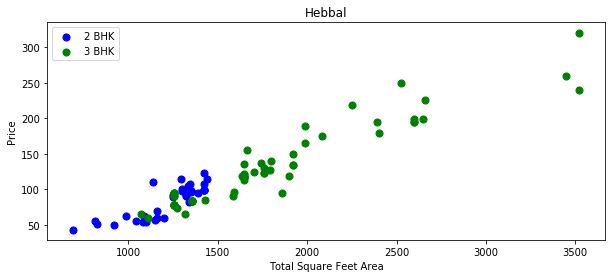

In [85]:
def prepareScatterChar(dataFrame,location):
    bhk2 = dataFrame[(dataFrame['location'] == location) & (dataFrame['BHK'] == 2)]
    bhk3 = dataFrame[(dataFrame.location == location) & (dataFrame.BHK == 3)]
    plt.rcParams['figure.figsize'] = (10,4)
    plt.scatter(bhk2.t_sqft, bhk2.price, color = 'blue', label = '2 BHK', s= 50)
    plt.scatter(bhk3.t_sqft, bhk3.price, color = 'green', label = '3 BHK', s= 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()
    
#prepareScatterChar(df7,'Rajaji Nagar')
prepareScatterChar(df7,'Hebbal')

In [86]:
df7.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,BHK,t_sqft,price_per_sqrft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850,4.0,1.0,428.0,4,2850.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630,3.0,2.0,194.0,3,1630.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875,2.0,3.0,235.0,3,1875.0,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200,2.0,0.0,130.0,3,1200.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235,2.0,2.0,148.0,2,1235.0,11983.805668
5,Super built-up Area,1st Block Jayanagar,4 BHK,2750,4.0,0.0,413.0,4,2750.0,15018.181818
6,Super built-up Area,1st Block Jayanagar,4 BHK,2450,4.0,2.0,368.0,4,2450.0,15020.408163
7,Super built-up Area,1st Phase JP Nagar,4 BHK,2825,4.0,3.0,250.0,4,2825.0,8849.557522
8,Super built-up Area,1st Phase JP Nagar,3 BHK,1875,3.0,1.0,167.0,3,1875.0,8906.666667
9,Built-up Area,1st Phase JP Nagar,5 Bedroom,1500,5.0,2.0,85.0,5,1500.0,5666.666667


In [122]:
def removeBHKOutliers(dataFrame):
    exlude_indices = np.array([])
    for location, location_df in dataFrame.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqrft),
                'std' : np.std(bhk_df.price_per_sqrft),
                'count' : bhk_df.shape[0]
            }
           
            
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5 :
                exlude_indices = np.append(exlude_indices,bhk_df[bhk_df.price_per_sqrft < (stats ['mean'])].index.values)
    
    return dataFrame.drop(exlude_indices, axis = 'index')
        
    
    

In [123]:
df8 = removeBHKOutliers(df7)
df8.shape

(7342, 10)

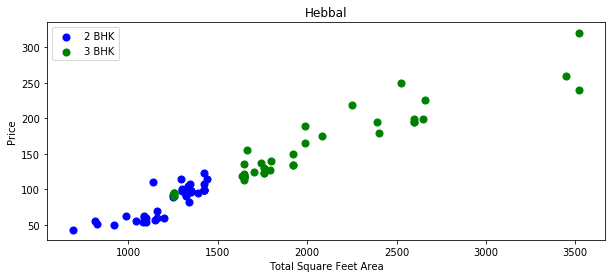

In [125]:
prepareScatterChar(df8,'Hebbal')

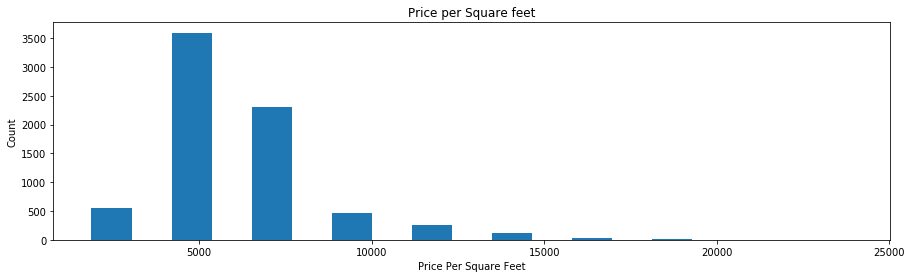

In [131]:
plt.rcParams['figure.figsize'] = (15,4)
plt.hist(df8.price_per_sqrft, rwidth = 0.5)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.title("Price per Square feet")
plt.show()

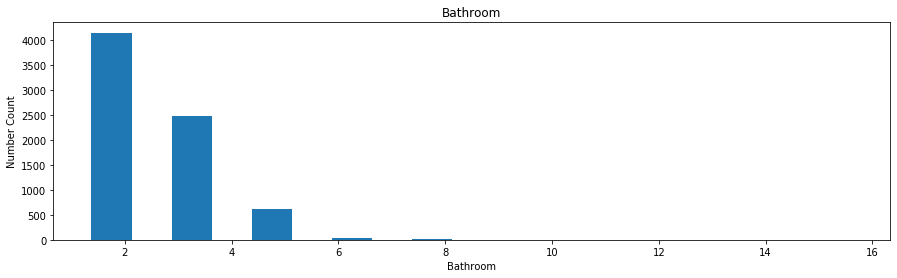

In [134]:
plt.rcParams['figure.figsize'] = (15,4)
plt.hist(df8.BHK, rwidth = 0.5)
plt.xlabel("Bathroom")
plt.ylabel("Number Count")
plt.title("Bathroom")
plt.show()

 ## Analyse Below Data Bathroom against BHK
 We can see that 4 BHK has 7 bathromm, which is quite unusaul.similaryly see another data points

In [136]:
## Now Check Bathroom
df8[df8.bath > df8.BHK + 2]

,area_type,location,size,total_sqft,bath,balcony,price,BHK,t_sqft,price_per_sqrft
1634,Built-up Area,Chikkabanavar,4 Bedroom,2460,7.0,2.0,80.0,4,2460.0,3252.032520
5267,Built-up Area,Nagasandra,4 Bedroom,7000,8.0,2.0,450.0,4,7000.0,6428.571429
6748,Super built-up Area,Thanisandra,3 BHK,1806,6.0,2.0,116.0,3,1806.0,6423.034330
8452,Super built-up Area,other,6 BHK,11338,9.0,1.0,1000.0,6,11338.0,8819.897689


In [137]:
df9 = df8[df8.bath < df8.BHK + 2]

In [138]:
df9.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,t_sqft,price_per_sqrft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850,4.0,1.0,428.0,4,2850.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630,3.0,2.0,194.0,3,1630.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875,2.0,3.0,235.0,3,1875.0,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200,2.0,0.0,130.0,3,1200.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235,2.0,2.0,148.0,2,1235.0,11983.805668


In [140]:
## Now lets drop unnessary feature like size: weh have BHK,price_per_sqrft: we have price,area type
cleanedData = df9.drop(['area_type','size','price_per_sqrft'], axis = 1)

In [142]:
cleanedData.head(10)

,location,total_sqft,bath,balcony,price,BHK,t_sqft
0,1st Block Jayanagar,2850,4.0,1.0,428.0,4,2850.0
1,1st Block Jayanagar,1630,3.0,2.0,194.0,3,1630.0
2,1st Block Jayanagar,1875,2.0,3.0,235.0,3,1875.0
3,1st Block Jayanagar,1200,2.0,0.0,130.0,3,1200.0
4,1st Block Jayanagar,1235,2.0,2.0,148.0,2,1235.0
5,1st Block Jayanagar,2750,4.0,0.0,413.0,4,2750.0
6,1st Block Jayanagar,2450,4.0,2.0,368.0,4,2450.0
8,1st Phase JP Nagar,1875,3.0,1.0,167.0,3,1875.0
9,1st Phase JP Nagar,1500,5.0,2.0,85.0,5,1500.0
10,1st Phase JP Nagar,2065,4.0,1.0,210.0,3,2065.0


## Now we have with  handle categorical data which is location

In [146]:
## we use one hot encoder
dummies = pd.get_dummies(cleanedData.location)

In [147]:
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
## Add to our data frame
#dummies
cleanedData = pd.concat([cleanedData,dummies.drop('other', axis = 'columns')], axis = 'columns') # drop one dummies column to avoid trapping



In [151]:
cleanedData.drop('location', axis = 'columns',inplace = True)

In [152]:
cleanedData.head()

,total_sqft,bath,balcony,price,BHK,t_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850,4.0,1.0,428.0,4,2850.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630,3.0,2.0,194.0,3,1630.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875,2.0,3.0,235.0,3,1875.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200,2.0,0.0,130.0,3,1200.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235,2.0,2.0,148.0,2,1235.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
cleanedData.drop('total_sqft', axis = 'columns',inplace = True)

In [165]:
cleanedData.shape

(7264, 245)

## Now We rae ready to Bulid Machine Learnig Model

In [166]:
X = cleanedData.drop('price', axis = 'columns')
y = cleanedData.price

In [157]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [162]:
from sklearn.linear_model import LinearRegression

In [168]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.8078584215185503

In [169]:
## Now Evaluate Model

In [171]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(lr, X, y,cv = cv)

array([0.80785842, 0.77175849, 0.8440255 , 0.8420852 , 0.82940429])

## We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [182]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
    'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'oob_score' : [True],
                'max_depth' : [2],
                'max_features' : ['auto'],
                'criterion': ['mse','mae']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Khan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Khan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Khan\Anaconda3\lib\site-pac

,model,best_score,best_params
0,linear_regression,0.819026,{'normalize': True}
1,lasso,0.661091,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.635065,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,random_forest,0.610539,"{'criterion': 'mse', 'max_depth': 2, 'max_feat..."


In [183]:
## Based on Performance we will kepp lineramodel,now lets export it
import pickle
with open('priceModel.pickle','wb') as f:
    pickle.dump(lr, f)
    

## Export location and column information to a file that will be useful later on in our prediction application

In [184]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))